In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import plotly.express as px

In [ ]:
df = pd.read_csv('apps.csv')
df


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
df1 = pd.read_csv('user_reviews.csv')
df1

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
#Data Preparation
# Remove missing values from the 'Reviews' column
df1.dropna(subset=['Translated_Review'], inplace=True)
print(df1.isnull().sum())

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


In [ ]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [ ]:
# Handling missing values

# For numeric columns like 'Rating', you can impute missing values with the mean
mean_rating = df['Rating'].mean()
df['Rating'].fillna(mean_rating, inplace=True)

# For categorical columns like 'Current Ver' and 'Android Ver', you can impute missing values with the most frequent value
most_frequent_current_ver = df['Current Ver'].mode()[0]
df['Current Ver'].fillna(most_frequent_current_ver, inplace=True)

most_frequent_android_ver = df['Android Ver'].mode()[0]
df['Android Ver'].fillna(most_frequent_android_ver, inplace=True)

# For columns like 'Size', it depends on the context. You can choose to drop the column if it's not critical or impute missing values with a specific value (e.g., median)
# Here's how to impute missing values in the 'Size' column with the median value
median_size = df['Size'].median()
df['Size'].fillna(median_size, inplace=True)

# After handling missing values, you can check again for any remaining missing values
print("Missing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Unnamed: 0        0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


In [ ]:
# Remove the "Unnamed: 0" column
df.drop("Unnamed: 0", axis=1, inplace=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,Sya9a Maroc - FR,FAMILY,4.500000,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,Parkinson Exercices FR,MEDICAL,4.173243,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,12.0,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
df.describe()

,Rating,Reviews,Size
count,9659.000000,9.659000e+03,9659.000000
mean,4.173243,2.165926e+05,19.328854
std,0.494312,1.831320e+06,20.584647
min,1.000000,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,5.300000
50%,4.200000,9.670000e+02,12.000000
75%,4.500000,2.940100e+04,25.000000
max,5.000000,7.815831e+07,100.000000


In [ ]:
df1.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


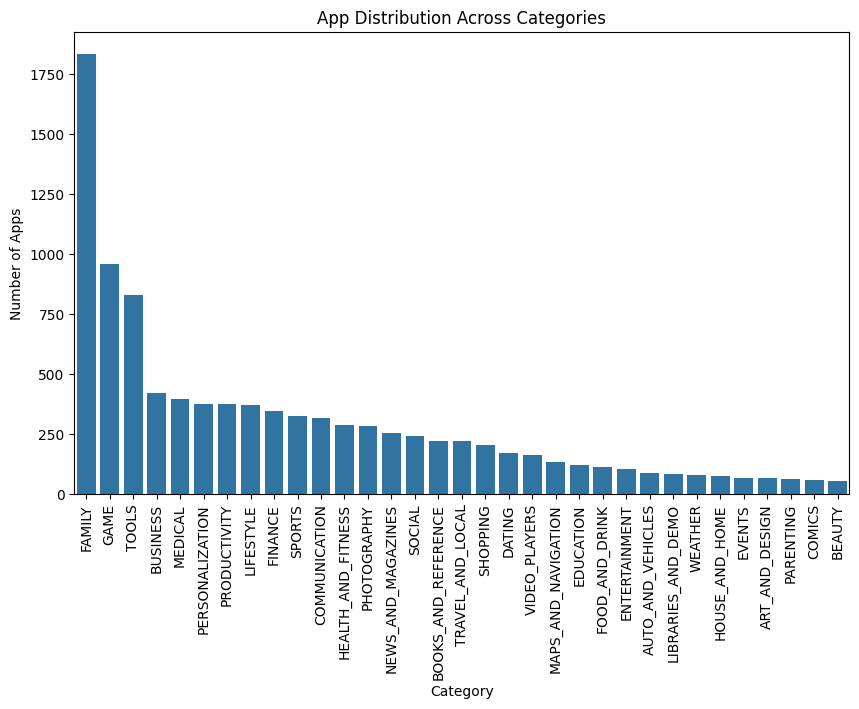

In [ ]:
# Category Exploration
# Investigate app distribution across categories
category_counts = df['Category'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('App Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.show()


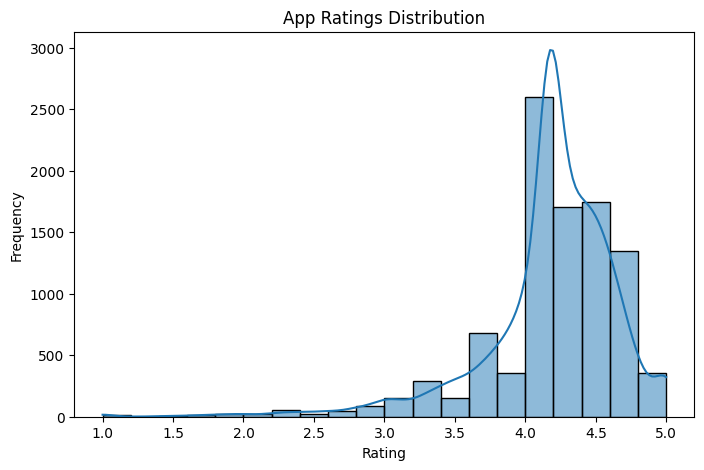

In [ ]:
# Metrics Analysis
# Examine app ratings, size, popularity, and pricing trends
# For example, visualize app ratings distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('App Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


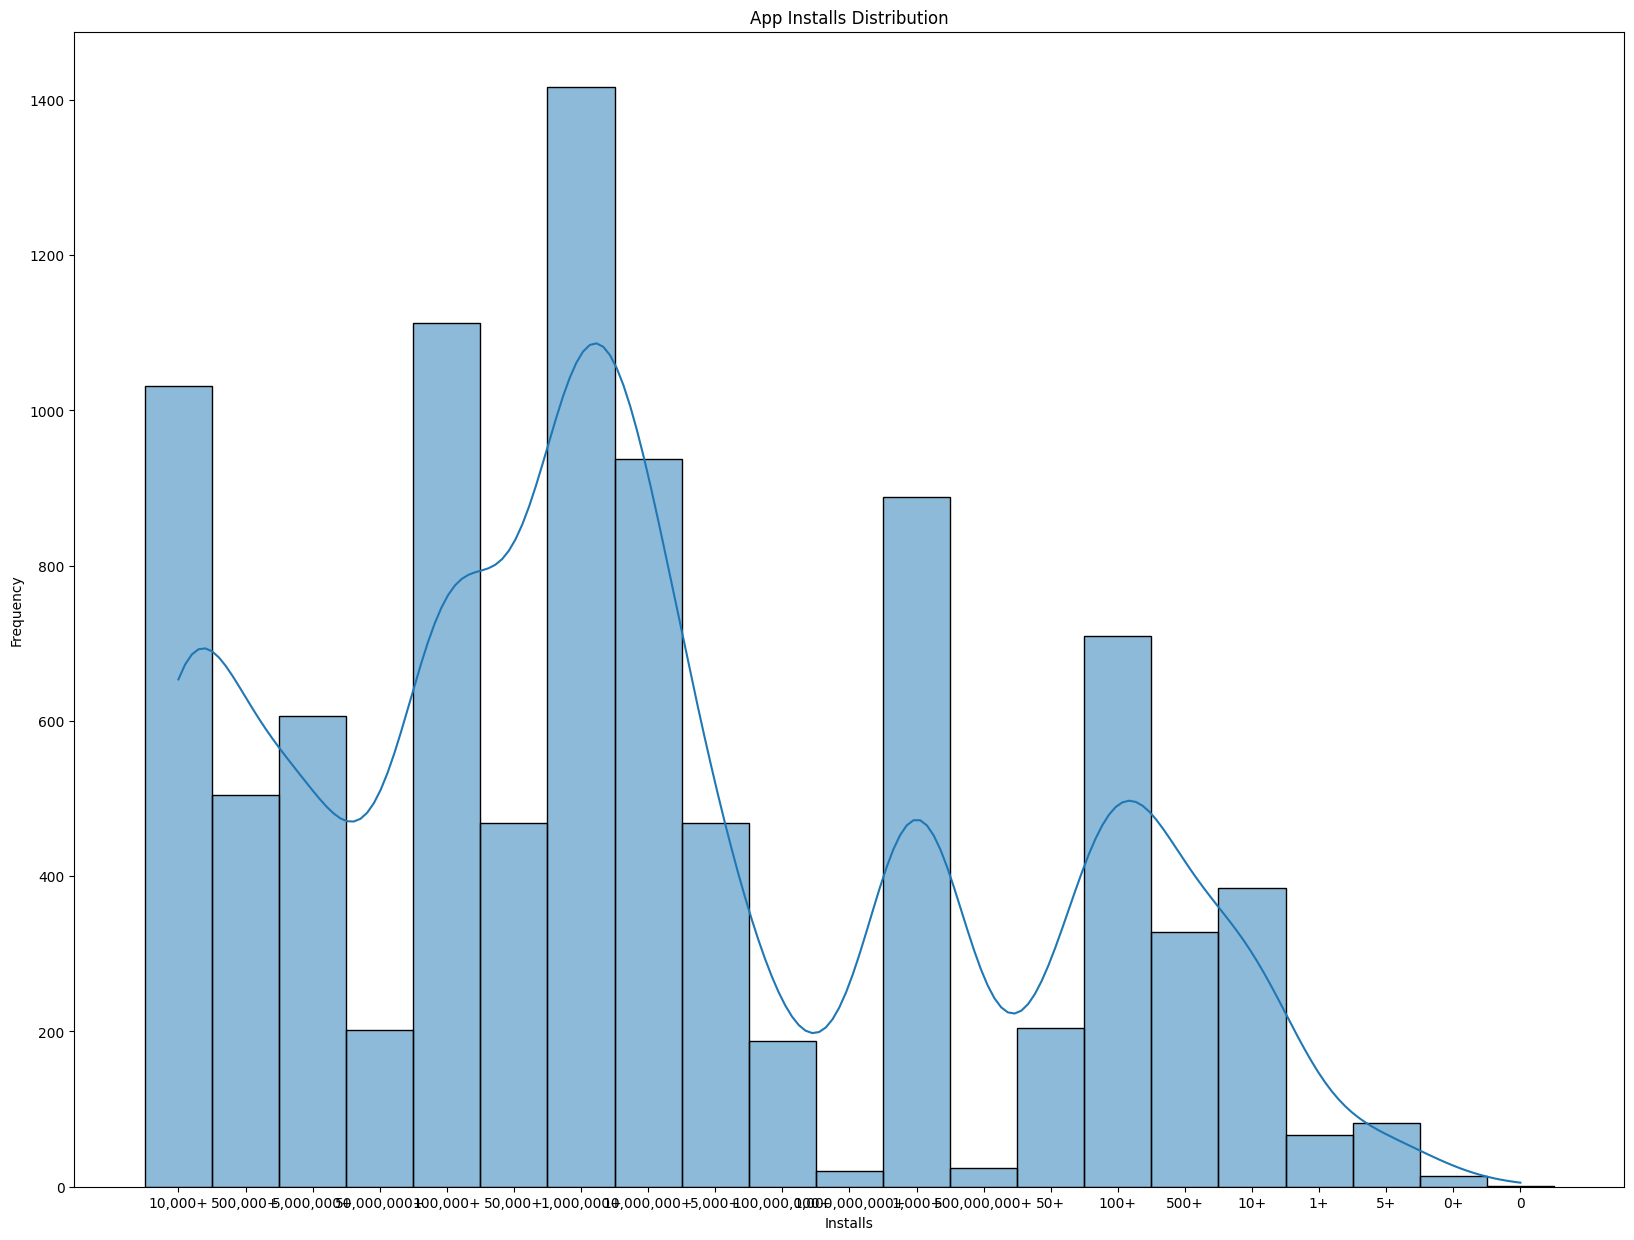

In [ ]:
# Popularity: Visualizing Installs Distribution
plt.figure(figsize=(20, 15))
sns.histplot(df['Installs'], bins=10, kde=True)
plt.title('App Installs Distribution')
plt.xlabel('Installs')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Function to assess sentiment through reviews
def analyze_sentiment(review):
    sentiment_score = sia.polarity_scores(review)['compound']
    if sentiment_score >= 0.05:
        return 'Positive'
    elif sentiment_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Example usage
# Assuming 'reviews' is a column containing user reviews in your DataFrame 'df'
df1['Sentiment'] = df1['Translated_Review'].apply(analyze_sentiment)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Display the DataFrame with the sentiment analysis results
print(df1[['Sentiment_Polarity', 'Sentiment']])


       Sentiment_Polarity Sentiment
0                1.000000  Positive
1                0.250000  Positive
3                0.400000  Positive
4                1.000000  Positive
5                1.000000  Positive
...                   ...       ...
64222            0.173333  Negative
64223            0.225000  Positive
64226           -0.287500  Negative
64227            0.800000  Positive
64230           -0.316667  Negative

[37427 rows x 2 columns]


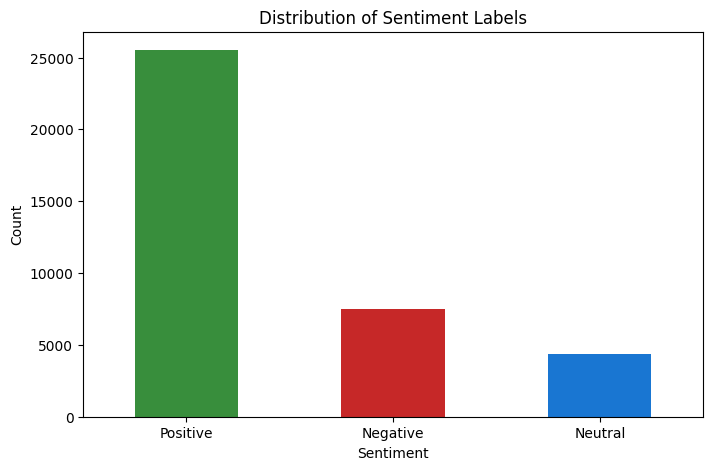

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment label
sentiment_counts = df1['Sentiment'].value_counts()

# Plotting
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['#388E3C', '#C62828', '#1976D2'])  # Dark green, Dark red, Dark blue
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Interactive Visualization
# Utilize code for compelling visualizations
# For example, interactive plots using Plotly
fig = px.scatter(df, x='Rating', y='Reviews', color='Category', hover_name='App', title='App Ratings vs Reviews by Category')
fig.show()


<ipython-input-17-cfa8dc1070d3>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




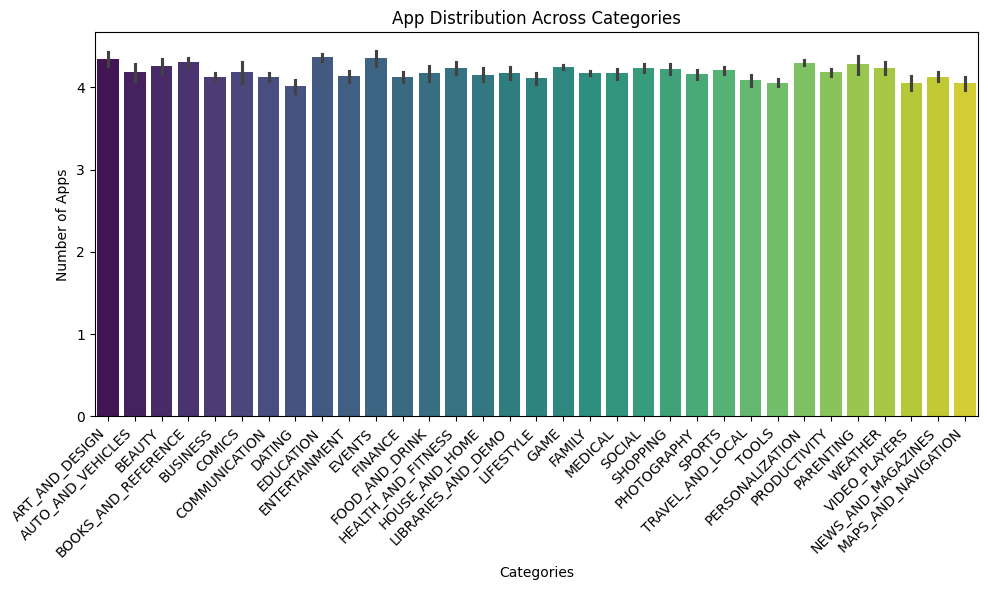

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Rating', data=df, palette='viridis')
plt.title('App Distribution Across Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


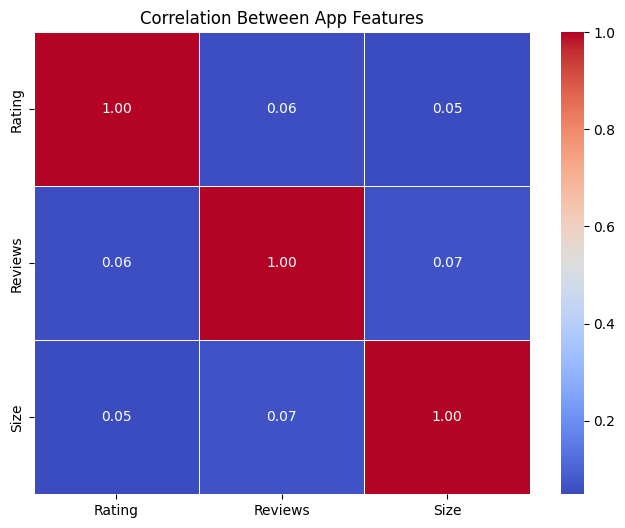

In [ ]:

# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix
corr_matrix = df[numeric_columns].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Between App Features')
plt.show()

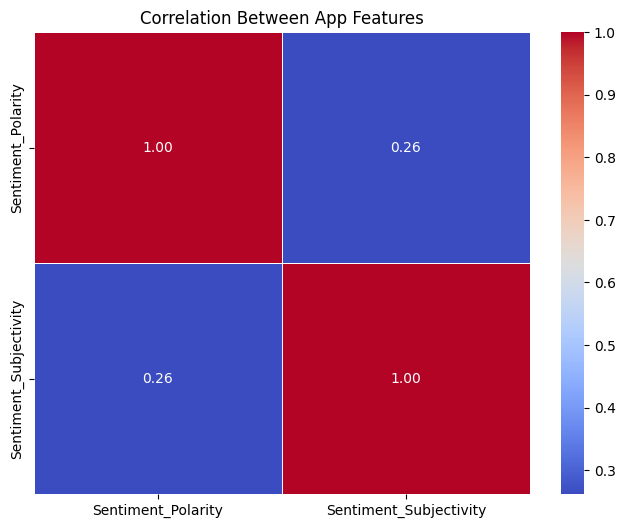

In [ ]:

# Select numeric columns
numeric_columns = df1.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix
corr_matrix = df1[numeric_columns].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Between App Features')
plt.show()